<a href="https://colab.research.google.com/github/wouterhuls/FlavourPhysicsBND2023/blob/main/ckmmatrix_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise we parametrize the CKM matrix and draw the unitary triangles.

It is also an exercise in using sympy.

First, define these four real parameters.



Matrix([[cos(theta12)*cos(theta13), sin(theta12)*cos(theta13), exp(-I*conjugate(deltaKM))*sin(theta13)], [-exp(I*deltaKM)*sin(theta13)*sin(theta23)*cos(theta12) - sin(theta12)*cos(theta23), -exp(I*deltaKM)*sin(theta12)*sin(theta13)*sin(theta23) + cos(theta12)*cos(theta23), sin(theta23)*cos(theta13)], [-exp(I*deltaKM)*sin(theta13)*cos(theta12)*cos(theta23) + sin(theta12)*sin(theta23), -exp(I*deltaKM)*sin(theta12)*sin(theta13)*cos(theta23) - sin(theta23)*cos(theta12), cos(theta13)*cos(theta23)]])
Matrix([[0.974352165894858, 0.224998476474842, 0.00368000000000000], [0.224860589823423, 0.973485356352655, 0.0419997156086372], [0.00869321346007730, 0.0412546549003131, 0.999110845446487]])
Matrix([[1.0 + 8.6736e-19*I, -0.e-139 + 0.e-142*I, 0.e-140 - 0.e-140*I], [-0.e-139 - 0.e-142*I, 1.0000, 0.e-126 + 0.e-128*I], [0.e-140 + 0.e-140*I, 0.e-126 + 0.e-128*I, 1.0000]])
Jarlskog invariant:  3.1140e-5
A: 0.829629629629630
lambda: 0.225000000000000
rho: 0.152783131121810
eta: 0.358195038110476
alpha

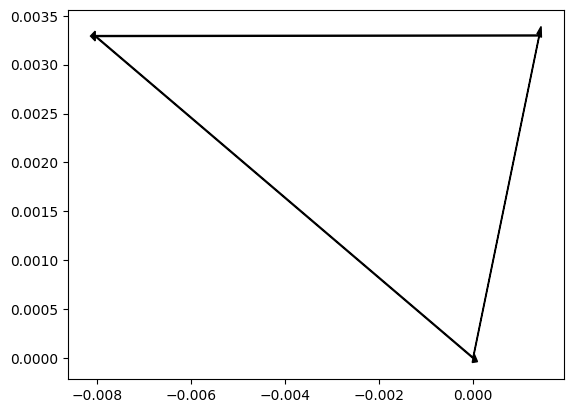

In [2]:
import sympy as sp

from sympy.physics.quantum.dagger import Dagger
from sympy.interactive.printing import init_printing

conjugate = sp.functions.elementary.complexes.conjugate

init_printing()

# define four real parameters
theta12, theta13, theta23, deltaKM = sp.symbols('theta12 theta13 theta23 deltaKM')

s12 = sp.sin(theta12)
c12 = sp.cos(theta12)
s13 = sp.sin(theta13)
c13 = sp.cos(theta13)
s23 = sp.sin(theta23)
c23 = sp.cos(theta23)

# define the CKM matrix
expid     = sp.exp(sp.I * deltaKM)
expidstar = sp.functions.elementary.complexes.conjugate(expid)

# it makes a lot more sense to write this as a product


Vckm = sp.Matrix( [[c12*c13, s12*c13, s13*expidstar ],
                  [-s12*c23-c12*s23*s13*expid, c12*c23 - s12*s23*s13*expid, s23*c13],
                  [s12*s23-c12*c23*s13*expid, -c12*s23 - s12*c23*s13*expid, c23*c13]] )

print(Vckm)

# choose some values for the parameters
from math import asin, pi
valueset = { theta12: asin(0.2250), theta23:asin(0.04200), theta13:asin(0.00368),
            deltaKM:66.9*pi/180. }

print(sp.functions.elementary.complexes.Abs(Vckm).evalf(subs=valueset))
# I gues we did it right because this is close to unit matrix
print((Vckm * Dagger(Vckm)).evalf(5,subs=valueset))

# print the value of the Jarlskog invariant
J = c12 * c23 * c13**2 * s12 * s23* s13 * sp.sin(deltaKM)
print("Jarlskog invariant: ", J.evalf(5,subs=valueset))


# this is definition of Wolfenstein parameters in terms of CKM matrix elements
lamda = s12
A = s23 / s12**2
rho = sp.re( s13 * expidstar / (s12*s23) )
eta = - sp.im( s13 * expidstar / (s12*s23) )

print('A:',A.evalf(subs=valueset))
print('lambda:',lamda.evalf(subs=valueset))
print('rho:',rho.evalf(subs=valueset))
print('eta:',eta.evalf(subs=valueset))

# compute all angles of the unitarity triangle
Vcd = Vckm[1,0]
Vcb = Vckm[1,2]
Vtd = Vckm[2,0]
Vtb = Vckm[2,2]
Vud = Vckm[0,0]
Vub = Vckm[0,2]

beta  = sp.arg( - (Vcd*sp.conjugate(Vcb)) / (Vtd*sp.conjugate(Vtb)) )
alpha  = sp.arg( - (Vtd*sp.conjugate(Vtb)) / (Vud*sp.conjugate(Vub)) )
gamma  = sp.arg( - (Vud*sp.conjugate(Vub)) / (Vcd*sp.conjugate(Vcb)) )

print("alpha:",alpha.evalf(5,subs=valueset))
print("beta:",beta.evalf(5,subs=valueset))
print("gamma:",gamma.evalf(5,subs=valueset))

# compute sin(2beta)
print('sin(2beta):', (sp.sin(2*beta)).evalf(5,subs=valueset))

# draw a matrix with the 'sizes' of the elements
print("Vckm:", sp.Abs(Vckm).evalf(3,subs=valueset))

degtorad = pi/180.
leptonvalueset = { theta12: 33.41*degtorad, theta23:49.1*degtorad, theta13:8.54*degtorad,
             deltaKM:197*degtorad }
print("Vpnms:", sp.Abs(Vckm).evalf(3,subs=leptonvalueset))

# draw the unitarity triangle
import matplotlib.pyplot as plt
ax = plt.axes()
x = 0.
y = 0.
for i in range(3):
  z = Vckm[i,0] * conjugate(Vckm[i,2]) #/ ( Vckm[1,0] * conjugate(Vckm[1,2]) )
  dx = float(sp.re(z).evalf(5,subs=valueset))
  dy = float(sp.im(z).evalf(5,subs=valueset))
  print(x,y,dx,dy)
  plt.arrow(x,y,dx,dy,width=1e-5,head_width=1e-4, head_length=1e-4,fc='k', ec='k')
  x += dx
  y += dy

print("Jarlskog invariant for PNMS: ", J.evalf(5,subs=leptonvalueset))


